In [ ]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image

import matplotlib.pyplot as plt
import zipfile
from keras.utils import load_img

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d msambare/fer2013 

zip_ref = zipfile.ZipFile('fer2013.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/fer2013') # Extracts the files into the /fer2013 folder
zip_ref.close()

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 98% 59.0M/60.3M [00:02<00:00, 31.9MB/s]
100% 60.3M/60.3M [00:02<00:00, 23.3MB/s]


In [ ]:
train_path = "/fer2013/train/"
test_path = "/fer2013/test/"

print(os.listdir(test_path))
print(os.listdir(train_path))

['disgust', 'happy', 'sad', 'fear', 'surprise', 'neutral', 'angry']
['disgust', 'happy', 'sad', 'fear', 'surprise', 'neutral', 'angry']


In [ ]:
train_path = "/fer2013/train/"
test_path = "/fer2013/test/"
train_emotions = os.listdir(train_path)
test_emotions = os.listdir(test_path)

len_train = {}
len_test = {}

X_train = []
y_train = []

X_test = []
y_test = []

# Set the number of images to select from each category
num_train_images = 450
num_test_images = 150

for emotion in train_emotions:
    file_train = os.listdir(os.path.join(train_path, emotion))
    len_train[emotion] = len(file_train)
    #for filename in file_train[:num_train_images]:
    for filename in file_train:
      img_path = os.path.join(train_path, emotion) + '/' + filename
      img = Image.open(img_path)
      img = img.resize((48, 48))
      img_array = np.array(img)
      img_array = img_array.reshape(-1)
      X_train.append(img_array)
      y_train.append(emotion)

for emotion in test_emotions:
    file_test = os.listdir(os.path.join(test_path, emotion))
    len_test[emotion] = len(file_test) 
    #for filename in file_test[:num_test_images]:
    for filename in file_test:
      img_path = os.path.join(test_path, emotion) + '/' + filename
      img = Image.open(img_path)
      img = img.resize((48, 48))
      img_array = np.array(img)
      img_array = img_array.reshape(-1)
      X_test.append(img_array)
      y_test.append(emotion)
    
print("Train: ", len_train)
print("Test: ", len_test)

total_train = sum(len_train.values())
total_test = sum(len_test.values())

print("Total Train: ", total_train)
print("Total Test: ", total_test)


Train:  {'disgust': 436, 'happy': 7215, 'sad': 4830, 'fear': 4097, 'surprise': 3171, 'neutral': 4965, 'angry': 3995}
Test:  {'disgust': 111, 'happy': 1774, 'sad': 1247, 'fear': 1024, 'surprise': 831, 'neutral': 1233, 'angry': 958}
Total Train:  28709
Total Test:  7178


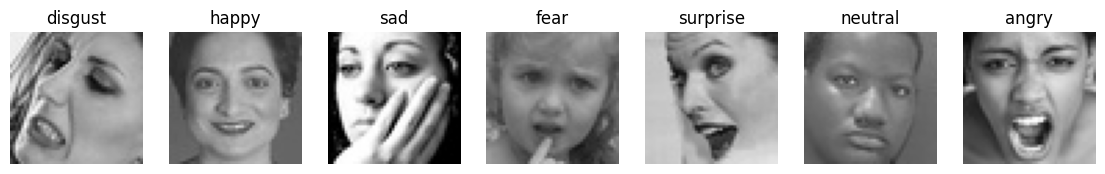

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_path):
    img = load_img((train_path + expression +'/'+ os.listdir(train_path + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
# convert the data to numpy arrays
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)

X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

# shuffling/randomizing training and testing data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
print(X_train)
print(y_train)

[[0.15294118 0.19215686 0.20392157 ... 0.39215686 0.40392157 0.41176471]
 [0.85490196 0.85882353 0.8627451  ... 0.80392157 0.68235294 0.28627451]
 [0.09803922 0.13333333 0.11764706 ... 0.21960784 0.14901961 0.10588235]
 ...
 [0.21568627 0.21568627 0.17254902 ... 0.08235294 0.10196078 0.0627451 ]
 [0.25882353 0.25490196 0.26666667 ... 0.96862745 0.95686275 0.95686275]
 [1.         1.         1.         ... 1.         1.         1.        ]]
['neutral' 'neutral' 'neutral' ... 'happy' 'fear' 'happy']


In [ ]:
def get_accuracy(method='multinomial', Solver = "lbfgs", c=1.0, Penalty = "lbfgs"):
    model = LogisticRegression(multi_class = method, solver = Solver, C = c,penalty= Penalty)

    # train the model on the training data
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("When Solver is ", Solver, " C = ", c, " and penality is" , Penalty)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    # Print the accuracy
    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    return test_accuracy, train_accuracy

When Solver is  liblinear  C =  0.1  and penality is l1


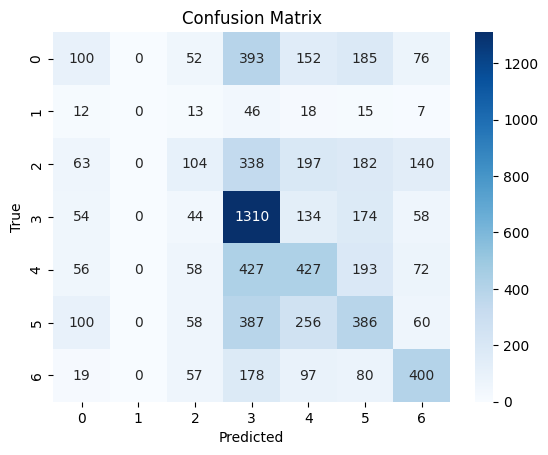

Train Accuracy:  0.39715768574314675
Test Accuracy:  0.37991083867372527
When Solver is  liblinear  C =  1  and penality is l1


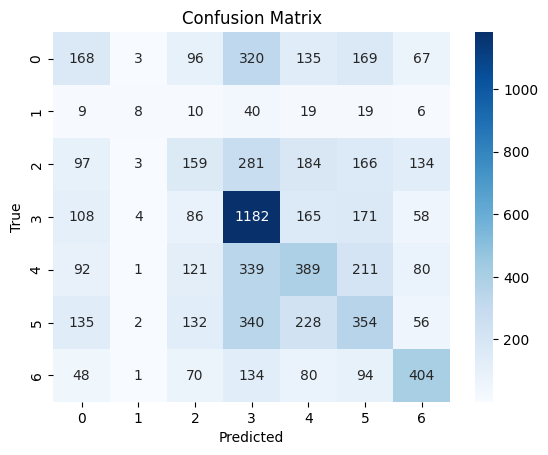

Train Accuracy:  0.4736493782437563
Test Accuracy:  0.3711340206185567
When Solver is  liblinear  C =  10  and penality is l1


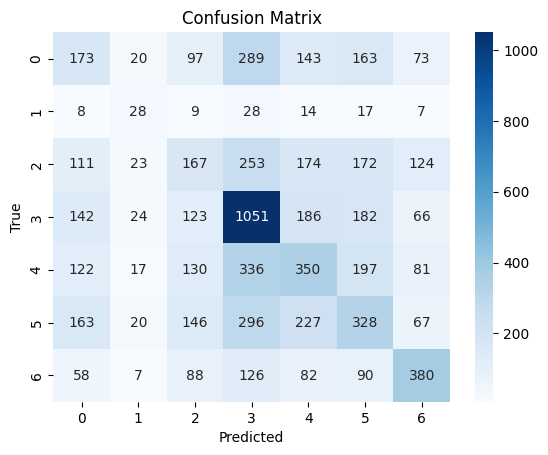

Train Accuracy:  0.5008185586401477
Test Accuracy:  0.3450821955976595
When Solver is  liblinear  C =  0.1  and penality is l2


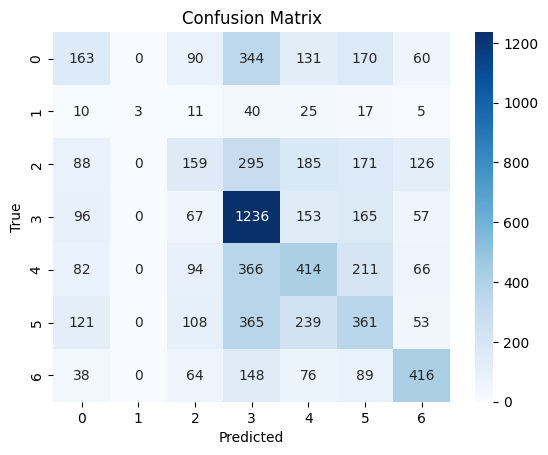

Train Accuracy:  0.453725312619736
Test Accuracy:  0.38339370298133185
When Solver is  liblinear  C =  1  and penality is l2


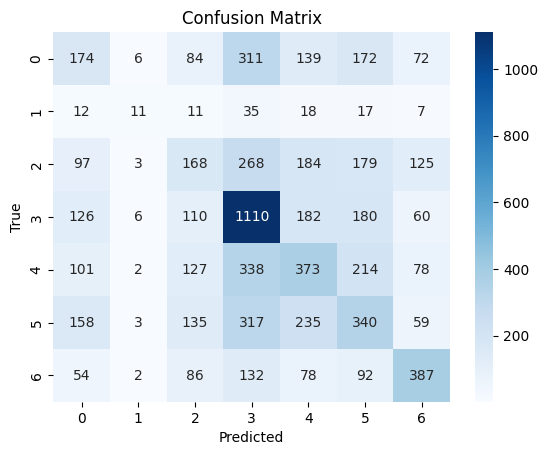

Train Accuracy:  0.48925424083040164
Test Accuracy:  0.35706324881582613
When Solver is  liblinear  C =  10  and penality is l2


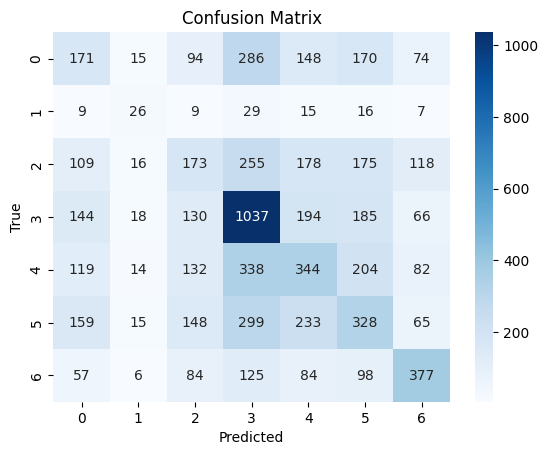

Train Accuracy:  0.5014455397262183
Test Accuracy:  0.34215658957927
Maximum accuracy =  0


In [ ]:
C = [.1, 1, 10] # Inverse of regularization strength; smaller values specify stronger regularization
penalties = ["l1", "l2"] # l1 and l2 penalty check
max_acc = 0
train_acc_array = []
test_acc_array = []

for p in penalties:
  for c in C:
    test_accuracy, train_accuracy = get_accuracy("ovr", "liblinear", c, p) 
    max_test = np.max(max_acc, test_accuracy)
    train_acc_array.append(train_accuracy)
    test_acc_array.append(test_accuracy)

print("Maximum accuracy = ", max_acc)

Text(0, 0.5, 'Accuracy')

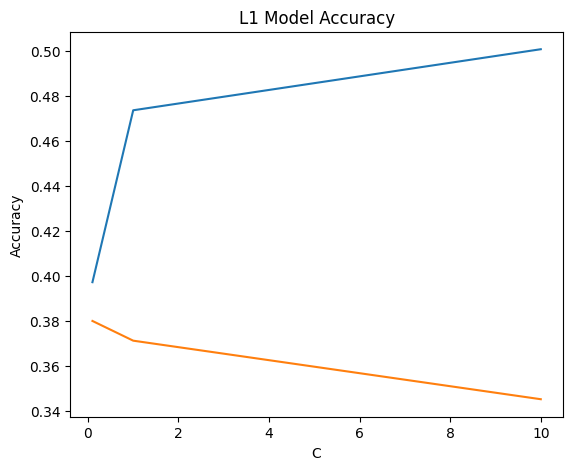

In [ ]:
# [0.3787963220952912,  0.37169127890777376,  0.3457787684591808]
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(C, train_acc_array[:3])
plt.plot(C, test_acc_array[:3])
plt.title('L1 Model Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')


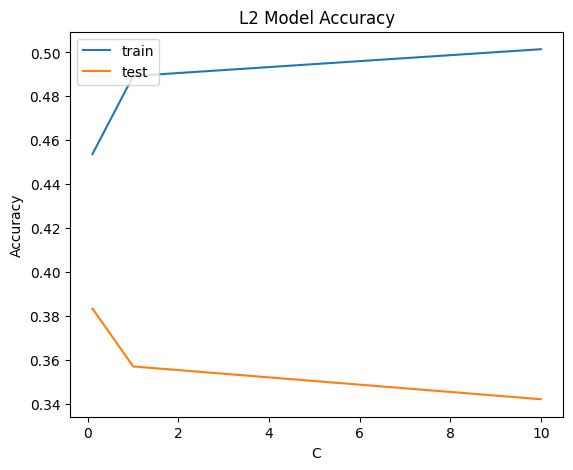

In [ ]:
# [0.38339370298133185,  0.35706324881582613,  0.34229590415157424]

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(C, train_acc_array[3:6])
plt.plot(C, test_acc_array[3:6])
plt.title('L2 Model Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

When Solver is  liblinear  C =  0.1  and penality is l1


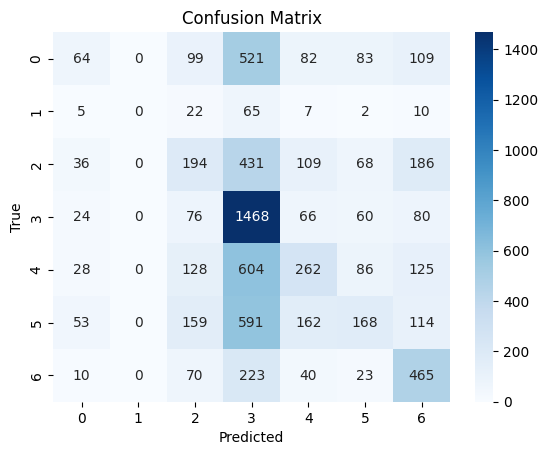

Train Accuracy:  0.39395311574767494
Test Accuracy:  0.3651434940094734
When Solver is  liblinear  C =  1  and penality is l1


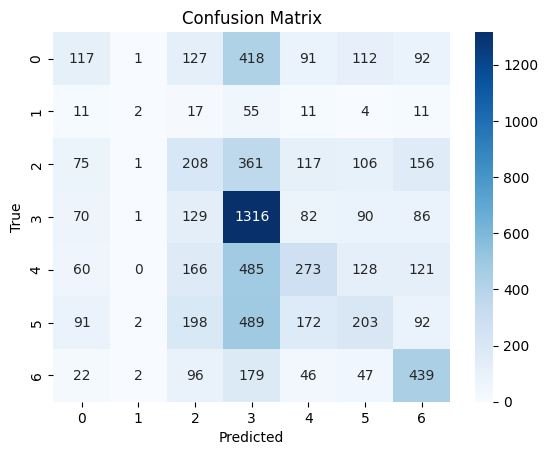

Train Accuracy:  0.46877285868542967
Test Accuracy:  0.3563666759543048
When Solver is  liblinear  C =  10  and penality is l1


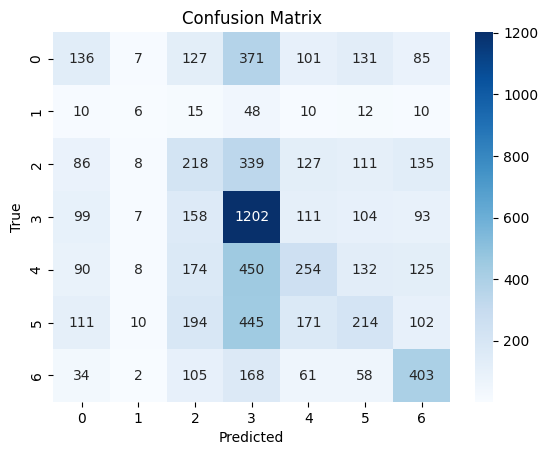

Train Accuracy:  0.49987808701104186
Test Accuracy:  0.3389523544162719
When Solver is  liblinear  C =  0.1  and penality is l2


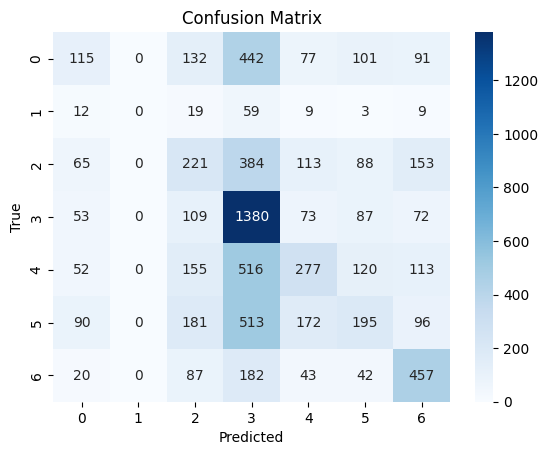

Train Accuracy:  0.45114772371033474
Test Accuracy:  0.3684870437447757
When Solver is  liblinear  C =  1  and penality is l2


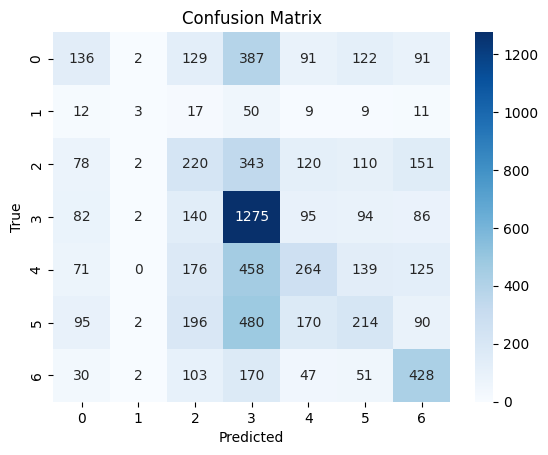

Train Accuracy:  0.4858058448570135
Test Accuracy:  0.35385901365282807
When Solver is  liblinear  C =  10  and penality is l2


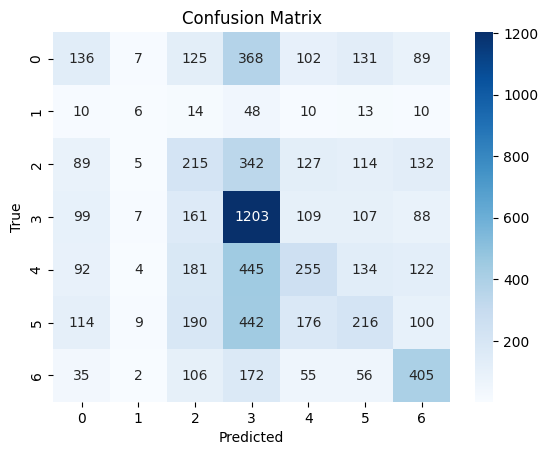

Train Accuracy:  0.4985196279912223
Test Accuracy:  0.33937029813318476
Maximum accuracy =  0


In [ ]:
X_train_sq = X_train**2

def get_accuracySQ(method='multinomial', Solver = "lbfgs", c=1.0, Penalty = "lbfgs"):
    model = LogisticRegression(multi_class = method, solver = Solver, C = c,penalty= Penalty)

    # train the model on the training data
    model.fit(X_train_sq, y_train)

    y_pred_train = model.predict(X_train_sq)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("When Solver is ", Solver, " C = ", c, " and penality is" , Penalty)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    # Print the accuracy
    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    return test_accuracy, train_accuracy

C = [.1, 1, 10] # Inverse of regularization strength; smaller values specify stronger regularization
penalties = ["l1", "l2"] # l1 and l2 penalty check
max_acc = 0
train_acc_array = []
test_acc_array = []

for p in penalties:
  for c in C:
    test_accuracy, train_accuracy = get_accuracySQ("ovr", "liblinear", c, p) 
    max_test = np.max(max_acc, test_accuracy)
    train_acc_array.append(train_accuracy)
    test_acc_array.append(test_accuracy)

print("Maximum accuracy = ", max_acc)

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(C, train_acc_array[:3])
plt.plot(C, test_acc_array[:3])
plt.title('L1 Model Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')

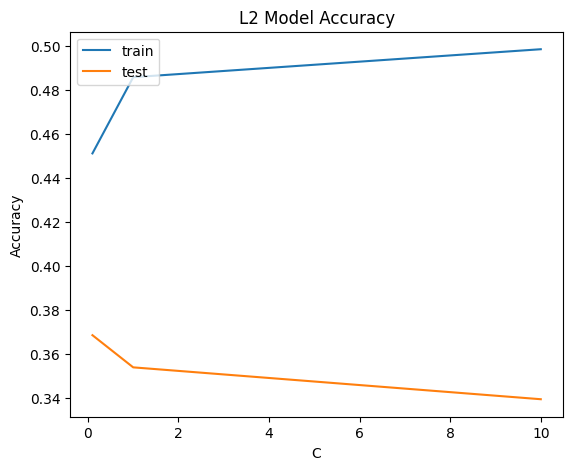

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(C, train_acc_array[3:6])
plt.plot(C, test_acc_array[3:6])
plt.title('L2 Model Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

When Solver is  liblinear  C =  0.1  and penality is l1


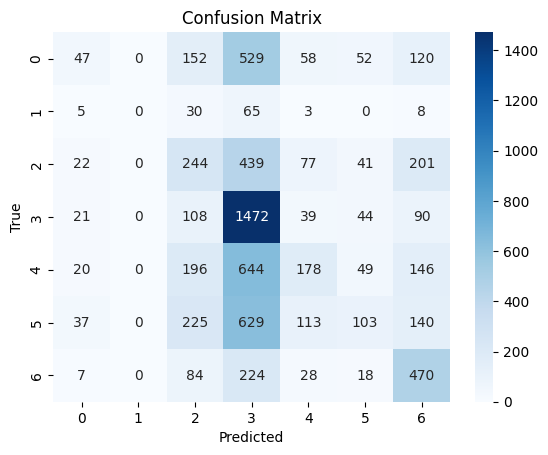

Train Accuracy:  0.3871608206485771
Test Accuracy:  0.3502368347729172
When Solver is  liblinear  C =  1  and penality is l1


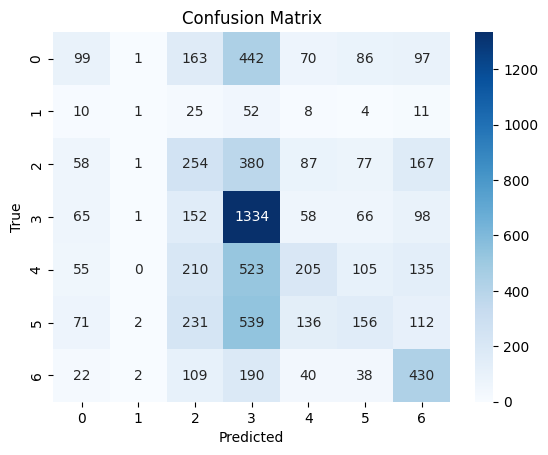

Train Accuracy:  0.4664739280365042
Test Accuracy:  0.34536082474226804
When Solver is  liblinear  C =  10  and penality is l1


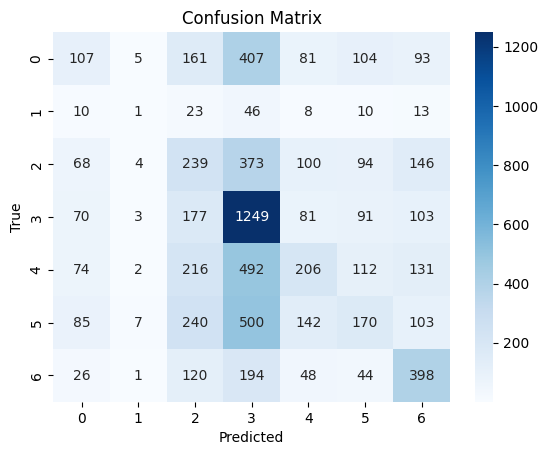

Train Accuracy:  0.49521056114807205
Test Accuracy:  0.33017553636110336
When Solver is  liblinear  C =  0.1  and penality is l2


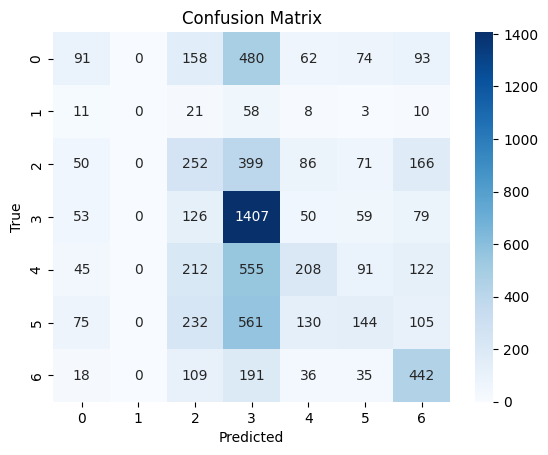

Train Accuracy:  0.44780382458462503
Test Accuracy:  0.3544162719420451
When Solver is  liblinear  C =  1  and penality is l2


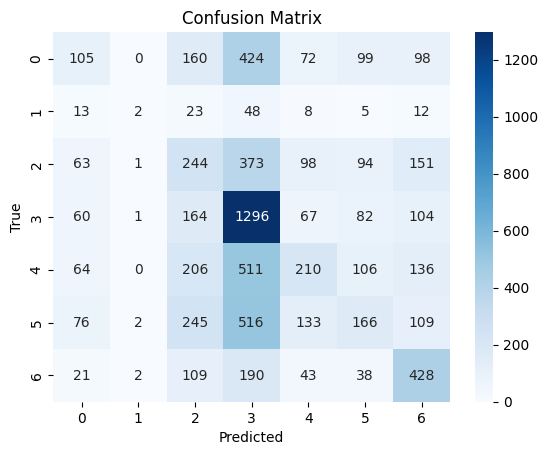

Train Accuracy:  0.4831585913824933
Test Accuracy:  0.34146001671774867
When Solver is  liblinear  C =  10  and penality is l2


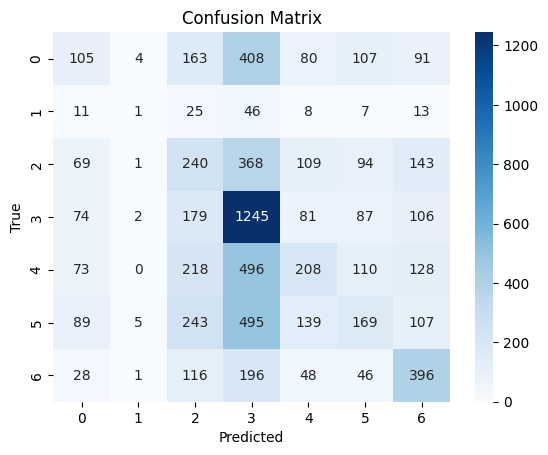

Train Accuracy:  0.4952453934306315
Test Accuracy:  0.3293396489272778
Maximum accuracy =  0


In [ ]:
X_train_cube = X_train**3

def get_accuracyCUBE(method='multinomial', Solver = "lbfgs", c=1.0, Penalty = "lbfgs"):
    model = LogisticRegression(multi_class = method, solver = Solver, C = c,penalty= Penalty)

    # train the model on the training data
    model.fit(X_train_cube, y_train)

    y_pred_train = model.predict(X_train_cube)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("When Solver is ", Solver, " C = ", c, " and penality is" , Penalty)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    # Print the accuracy
    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    return test_accuracy, train_accuracy

C = [.1, 1, 10] # Inverse of regularization strength; smaller values specify stronger regularization
penalties = ["l1", "l2"] # l1 and l2 penalty check
max_acc = 0
train_acc_array = []
test_acc_array = []

for p in penalties:
  for c in C:
    test_accuracy, train_accuracy = get_accuracyCUBE("ovr", "liblinear", c, p) 
    max_test = np.max(max_acc, test_accuracy)
    train_acc_array.append(train_accuracy)
    test_acc_array.append(test_accuracy)

print("Maximum accuracy = ", max_acc)

Text(0, 0.5, 'Accuracy')

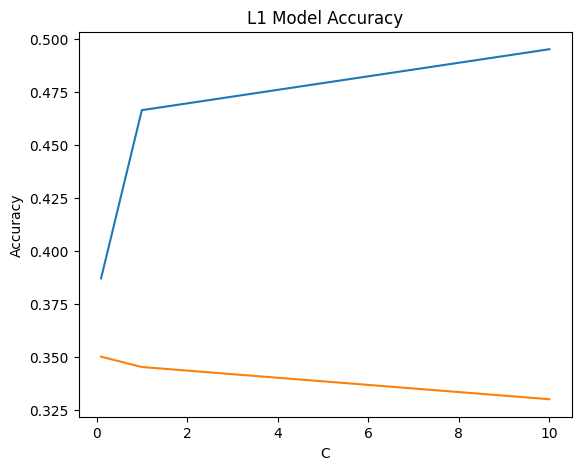

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(C, train_acc_array[:3])
plt.plot(C, test_acc_array[:3])
plt.title('L1 Model Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')

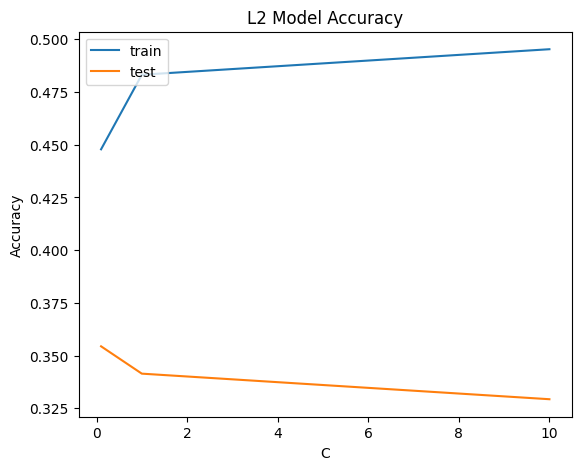

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(C, train_acc_array[3:6])
plt.plot(C, test_acc_array[3:6])
plt.title('L2 Model Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()